In [1]:
%matplotlib inline
import random
import os
import json
import sys
import string
import unicodedata
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

In [2]:
#Given local path, find full path
def PathFinder(path):
    script_dir = os.path.dirname('__file__')
    fullpath = os.path.join(script_dir,path)
    return fullpath

#Read Data for Deep Learning
def ReadData(path):
    fullpath=PathFinder(path)
    return pd.read_csv(fullpath, sep=',', header=0,index_col=False)

In [3]:
data_df=ReadData('Data.txt')
domain_df=ReadData('Domain.txt')

In [4]:
data_df=data_df.join(domain_df.set_index('Domain'),on='Domain')

In [5]:
data_df

,Domain,Horizon,Size,Naive,Strengthened,Domain_Name
0,H,10,3,4.503,5.176,HVAC
1,H,10,6,34.314,16.639,HVAC
2,H,20,3,11.946,32.415,HVAC
3,H,20,6,651.069,677.459,HVAC
4,N,8,8,3600.000,1054.930,Navigation
5,N,8,10,3600.000,896.676,Navigation
6,N,10,8,3600.000,960.203,Navigation
7,N,10,10,3600.000,791.281,Navigation
8,R,10,3,5.426,5.865,Reservoir
9,R,10,4,23.953,11.073,Reservoir


In [6]:
data_final_df=data_df[['Domain_Name','Size','Horizon','Naive','Strengthened']]

In [7]:
data_final_df

,Domain_Name,Size,Horizon,Naive,Strengthened
0,HVAC,3,10,4.503,5.176
1,HVAC,6,10,34.314,16.639
2,HVAC,3,20,11.946,32.415
3,HVAC,6,20,651.069,677.459
4,Navigation,8,8,3600.000,1054.930
5,Navigation,10,8,3600.000,896.676
6,Navigation,8,10,3600.000,960.203
7,Navigation,10,10,3600.000,791.281
8,Reservoir,3,10,5.426,5.865
9,Reservoir,4,10,23.953,11.073


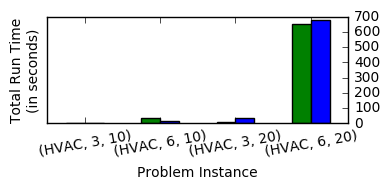

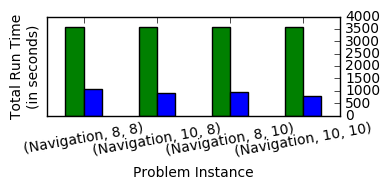

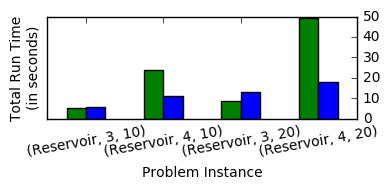

In [55]:
dfs = data_final_df.groupby(['Domain_Name'])
counter=0
leg=range(3)
for name,group in dfs:
    plot = group[['Domain_Name','Size','Horizon','Naive','Strengthened']].plot(kind='bar', color=['green','blue'],x=['Domain_Name','Size','Horizon'],legend=False)
    fig = plot.get_figure()
    ax = fig.add_subplot(111)
    ax.yaxis.tick_right()
    fig.set_size_inches(4, 2)
    plt.xticks(rotation=10)
    #plt.yticks(rotation=15)
    plt.ylabel('Total Run Time\n(in seconds)')
    #plt.xlabel('Domain,Size,Horizon')
    plt.xlabel('Problem Instance')
    plt.tight_layout()
    #leg[counter]=plt.legend(fancybox=True,loc='lower right', prop={'size':10})
    #leg[counter].get_frame().set_alpha(0.5)
    counter=counter+1
    plt.savefig(name+'_Timing.eps',format='eps')

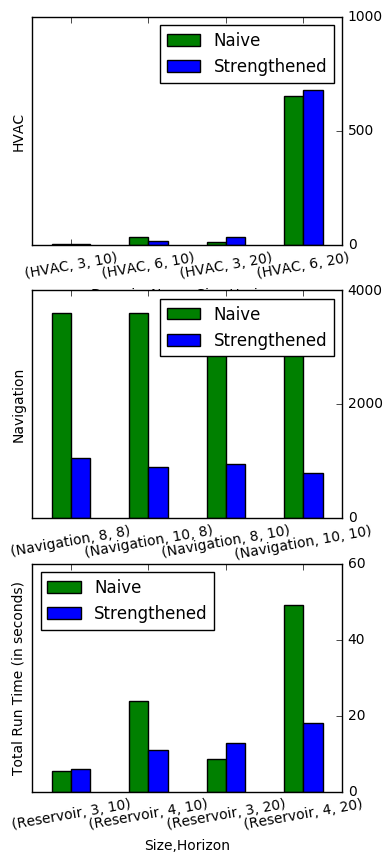

In [49]:
dfs = data_final_df.groupby(['Domain_Name'])
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 10))
counter=0
for name,group in dfs:
    plot = group[['Domain_Name','Size','Horizon','Naive','Strengthened']].plot(kind='bar', color=['green','blue'],x=['Domain_Name','Size','Horizon'],ax=axes[counter])
    axes[counter].yaxis.tick_right()   
    axes[counter].set_xticklabels(axes[counter].xaxis.get_majorticklabels(),rotation=10)
    axes[counter].locator_params(axis='y',nbins=3)
    axes[counter].set_ylabel(name)
    counter=counter+1 
    #axes.yaxis.tick_right()
    #axes.xticks(rotation=15)
    #plt.yticks(rotation=15)   
plt.ylabel('Total Run Time (in seconds)')
plt.xlabel('Size,Horizon')
#plt.xlabel('Problem Instance')
#plt.tight_layout()
#plt.legend(loc='upper left', shadow=True,prop={'size':10})
#plt.savefig(name+'_BAR.eps',format='eps')